In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("/Users/nivin/Desktop/EDA/StudentsPerformance.xls")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
#cleaning data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
student=df.drop(["race/ethnicity",'parental level of education'],axis=1)
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [16]:
#relationship analysis
corelation=student.corr()
corelation

/var/folders/84/v15t31bn045dbkj8hwcjwtvr0000gn/T/ipykernel_8825/1819688674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=student.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

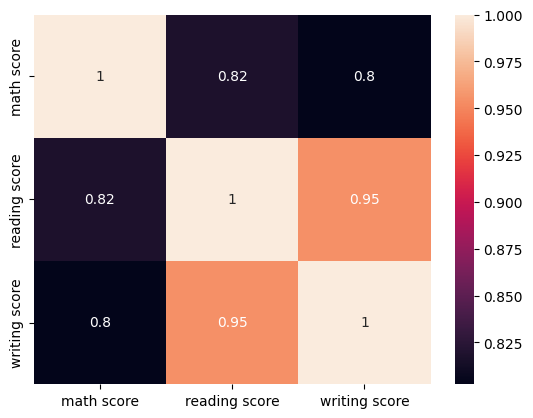

In [18]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


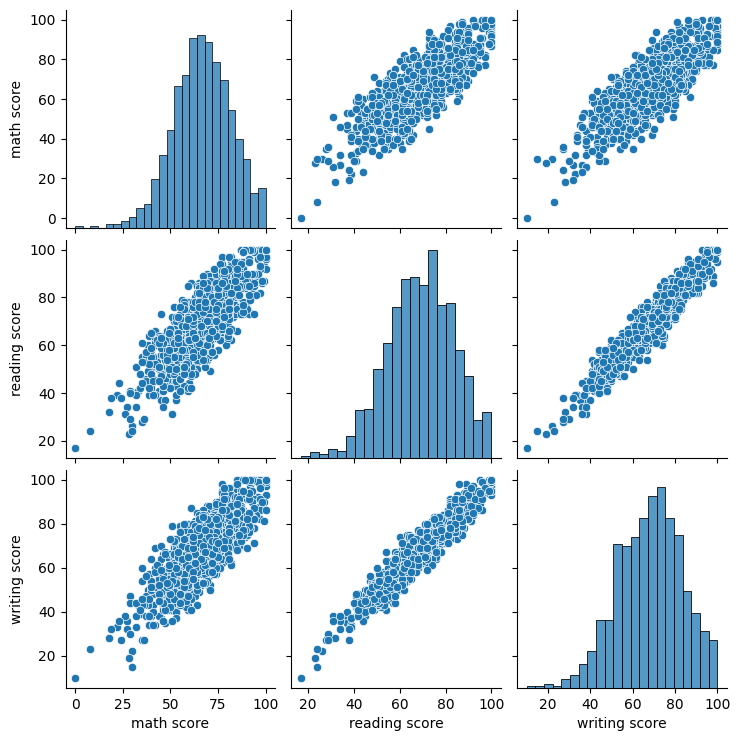

In [21]:
import matplotlib.pyplot as plt
sns.pairplot(student)
plt.show()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


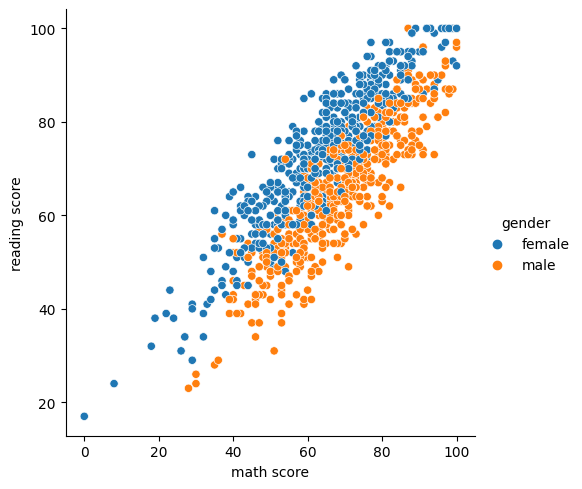

In [22]:
sns.relplot(x='math score',y='reading score',hue='gender',data=student)

/var/folders/84/v15t31bn045dbkj8hwcjwtvr0000gn/T/ipykernel_8825/3382259850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student["math score"],bins=5)


<Axes: xlabel='math score', ylabel='Density'>

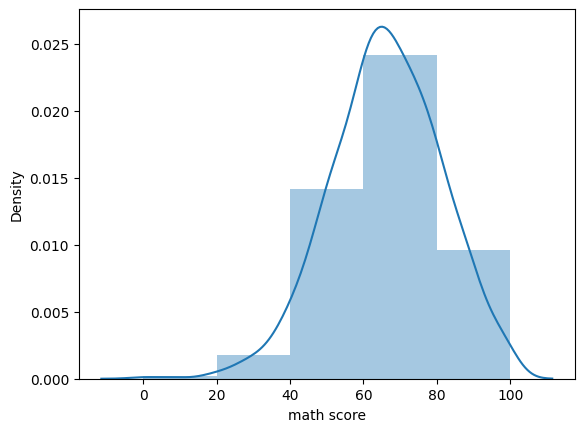

In [24]:
sns.distplot(student["math score"],bins=5)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


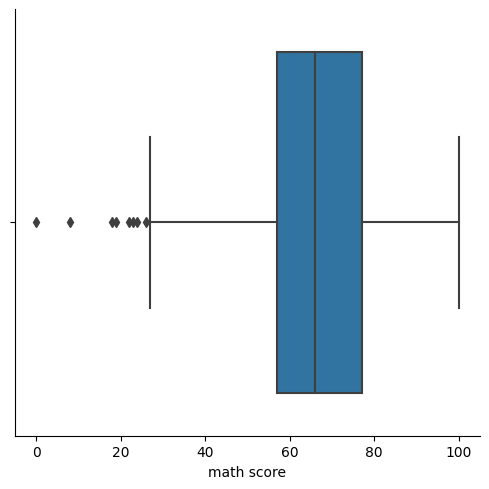

In [25]:
sns.catplot(x="math score",kind="box",data=student)